# AtlantOS transport arrays

Following http://www.oceansites.org/tma/index.html

In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import cmocean
import matplotlib.pyplot as plt

In [65]:
import numpy as np
import xarray as xr
import CM4Xutils
import sectionate as sec
import regionate as reg
import tosnap

In [66]:
path = "/work/hfd/codedev/CM4Xutils/data/coarsened/CM4Xp125_budgets_sigma2_2020-2024.zarr"
ds = xr.open_zarr(path)
grid = CM4Xutils.ds_to_grid(ds.fillna(0.))

Inferring Z grid coordinate: density `sigma2`


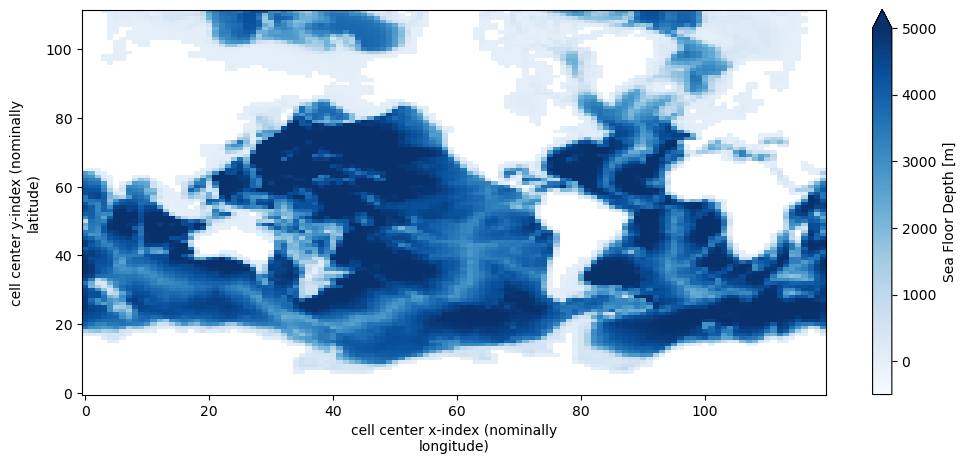

In [67]:
plt.figure(figsize=(12, 5))
grid._ds['deptho'].where(grid._ds['deptho']>0).plot(cmap="Blues", vmin=-500, vmax=5000)

In [68]:
sec1 = tosnap.atlantic_sections["Denmark Strait"]
sec2 = tosnap.atlantic_sections["Faroe Current"]
sec3 = tosnap.atlantic_sections["Faroe Bank"]

sec1, sec2, sec3

(Section(Denmark Strait, [(-44, 69), (-35, 69), (-25, 65), (-20, 65)]),
 Section(Faroe Current, [(-6.25, 62.25), (-14.0, 65.0)]),
 Section(Faroe Bank, [(-5.0, 56.75), (-5.0, 58.5), (-6.25, 61.0), (-6.25, 62.25)]))

In [69]:
section_test = sec.join_sections("Denmark Extended", sec1, sec2.reverse(), sec3)
section_test

Section(Denmark Extended, [(-44, 69), (-35, 69), (-25, 65), (-20, 65), (-14.0, 65.0), (-6.25, 62.25), (-6.25, 62.25), (-6.25, 61.0), (-5.0, 58.5), (-5.0, 56.75)])
 Children:
  - Section(Denmark Strait, [(-44, 69), (-35, 69), (-25, 65), (-20, 65)])
  - Section(Faroe Current, [(-14.0, 65.0), (-6.25, 62.25)])
  - Section(Faroe Bank, [(-6.25, 62.25), (-6.25, 61.0), (-5.0, 58.5), (-5.0, 56.75)])

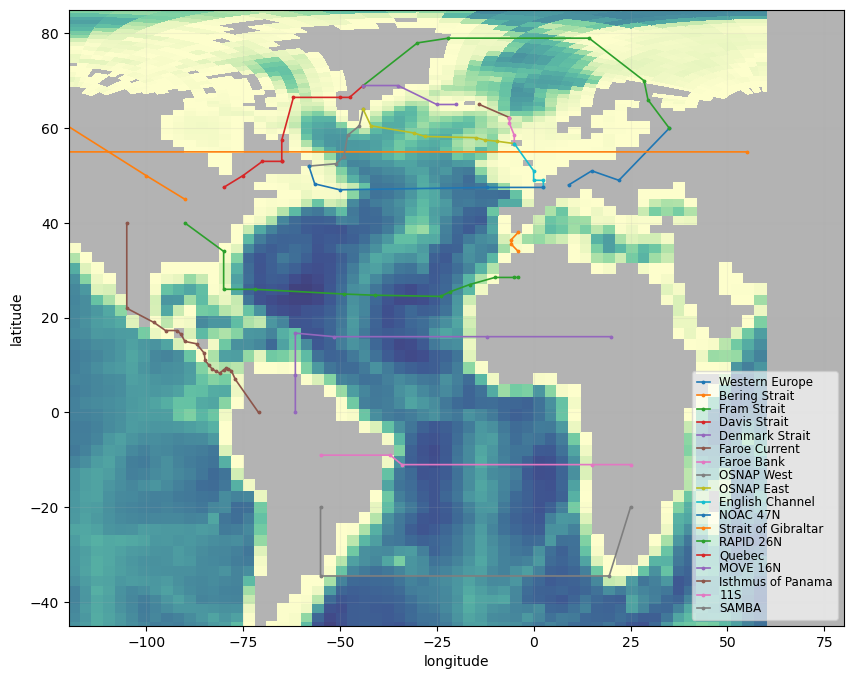

In [71]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.7, 0.7, 0.7))

plt.figure(figsize=(10, 8))

ax = plt.subplot(facecolor=(0.7, 0.7, 0.7))
plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'].where(grid._ds['deptho']>0),
    cmap=cmap, vmin=0, vmax=7500,
)
plt.xlim(-120, 80)
plt.ylim(-45, 85)

for sec_name, section in tosnap.atlantic_sections.items():
    lons, lats = section.lons, section.lats
    plt.plot(lons, lats, ".-", label=sec_name, markersize=3.5, linewidth=1.2)
    
plt.legend(loc="lower right", handlelength=1.1, labelspacing=0.025, fontsize=8.5, framealpha=0.65)
plt.grid(True, alpha=0.15)
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.savefig("AtlantOS_arrays.png", bbox_inches="tight", dpi=200)

In [72]:
atl = tosnap.grid_atlantic(grid)

In [73]:
atl.region_dict

{'South Atlantic':  'regionate.region.BoundedRegion("South Atlantic"),
 'Tropical Atlantic':  'regionate.region.BoundedRegion("Tropical Atlantic"),
 'Gulf of Mexico':  'regionate.region.BoundedRegion("Gulf of Mexico"),
 'Subtropical North Atlantic':  'regionate.region.BoundedRegion("Subtropical North Atlantic"),
 'Subpolar North Atlantic':  'regionate.region.BoundedRegion("Subpolar North Atlantic"),
 'Labrador Sea':  'regionate.region.BoundedRegion("Labrador Sea"),
 'Irminger Sea':  'regionate.region.BoundedRegion("Irminger Sea"),
 'Greenland Sea':  'regionate.region.BoundedRegion("Greenland Sea"),
 'High Arctic':  'regionate.region.BoundedRegion("High Arctic")}

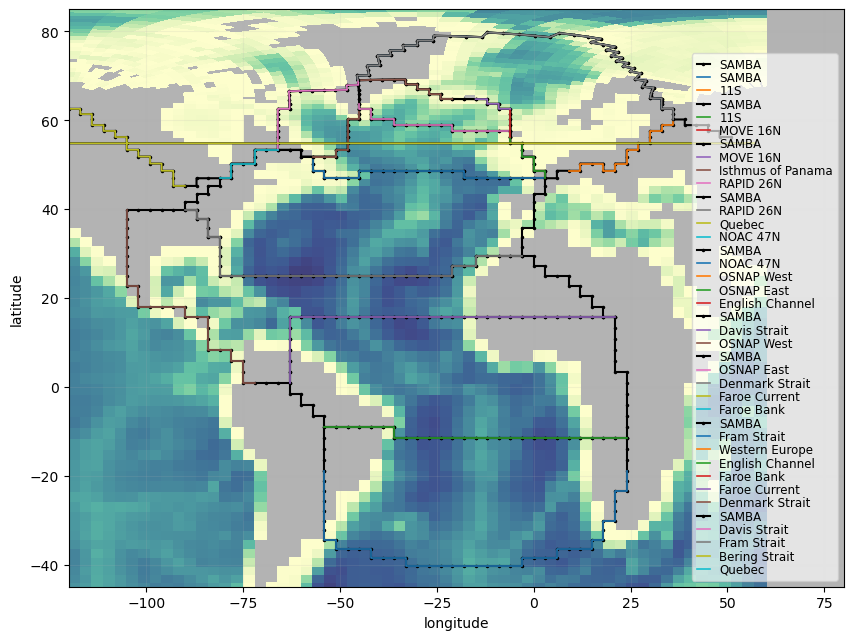

In [74]:
cmap = cmocean.cm.deep.copy()
cmap.set_bad((0.7, 0.7, 0.7))

plt.figure(figsize=(10, 7.5))

ax = plt.subplot(facecolor=(0.7, 0.7, 0.7))
plt.pcolor(
    grid._ds['geolon_c'],
    grid._ds['geolat_c'],
    grid._ds['deptho'].where(grid._ds['deptho']>0),
    cmap=cmap, vmin=0, vmax=7500,
)
plt.xlim(-120, 80)
plt.ylim(-45, 85)

for region_name, region in atl.region_dict.items():
    lons, lats = reg.loop(region.lons), reg.loop(region.lats)
    plt.plot(lons, lats, "k.-", label=sec_name, markersize=3, linewidth=1.5)
    for child_name, child in region.children.items():
        plt.plot(child.lons, child.lats, "-", label=child_name, linewidth=1.2)
    
plt.legend(loc="lower right", handlelength=1.1, labelspacing=0.025, fontsize=8.5, framealpha=0.65)
plt.grid(True, alpha=0.15)
plt.xlabel("longitude")
plt.ylabel("latitude");
plt.savefig("AtlantOS_arrays.png", bbox_inches="tight", dpi=200)

In [ ]:
import gfdl_utils.core as gu
import doralite
import numpy as np

In [ ]:
odiv = CM4Xutils.exp_dict["CM4Xp125"]["historical"]
pp = doralite.dora_metadata(odiv)["pathPP"]
ds = gu.open_static(pp, "ocean_annual")

In [ ]:
plt.pcolor(
    ds.geolon,
    ds.geolat,
    ds.deptho
)

In [ ]:
tosnap, tosnap.section_coords

In [689]:
reg.BoundedRegion in [reg.BoundedRegion]

True

(30.0, 65.0)

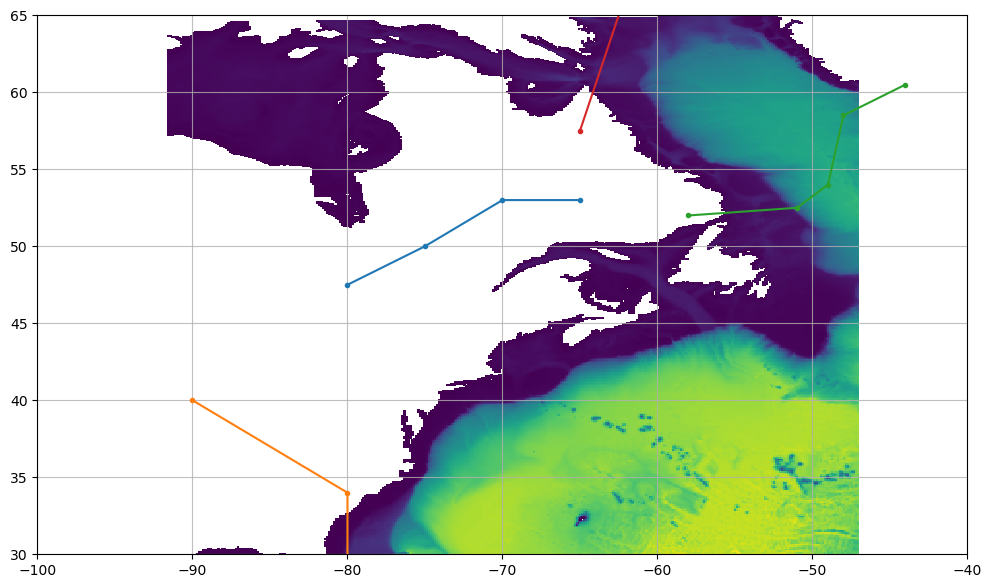

In [481]:
plt.figure(figsize=(12, 7))
ds_zoom = ds.sel(xh=slice(-90, -40), yh=slice(30, 65))
plt.pcolor(
    ds_zoom.geolon,
    ds_zoom.geolat,
    ds_zoom.deptho
)
plt.grid(True, alpha=0.8)

section = tosnap.section_coords["Quebec"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["RAPID 26N"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["OSNAP West"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

section = tosnap.section_coords["Davis Strait"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")
plt.xlim(-100, -40)
plt.ylim(30, 65)

(0.0, 25.0)

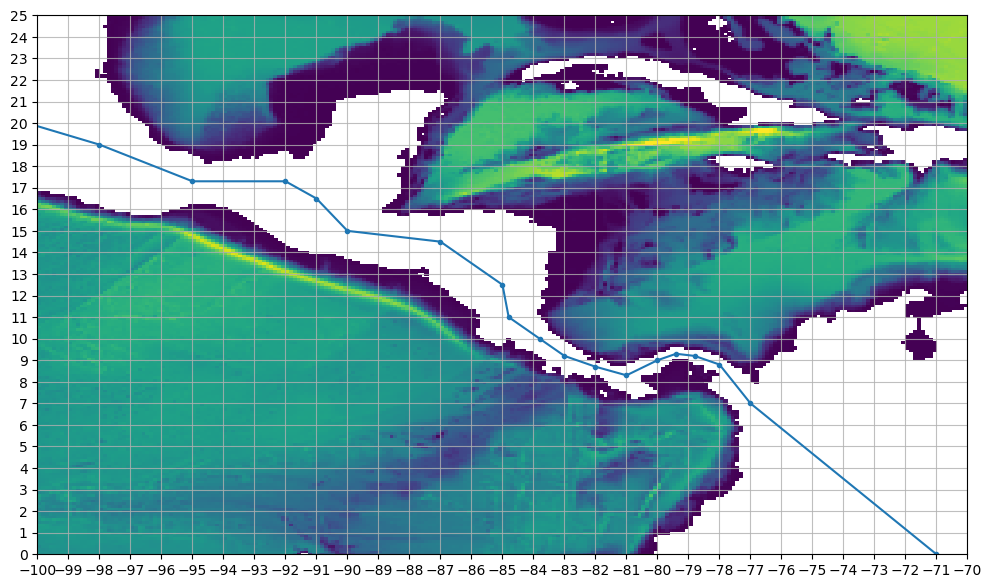

In [459]:
plt.figure(figsize=(12, 7))
ds_zoom = ds.sel(xh=slice(-130, -60), yh=slice(-5, 40))
plt.pcolor(
    ds_zoom.geolon,
    ds_zoom.geolat,
    ds_zoom.deptho
)
plt.xticks(np.arange(-125, -65, 1))
plt.yticks(np.arange(-5, 45, 1))
plt.grid(True, alpha=0.8)

section = tosnap.section_coords["Isthmus of Panama"]
lons, lats = section.lons, section.lats
plt.plot(lons, lats, ".-")

plt.xlim(-100, -70)
plt.ylim(0, 25)